# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Для генерации псевдослучайных значений в коде, что обеспечивает воспроизводимость результата.`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [ ]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [ ]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

In [ ]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [ ]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [ ]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

985
62


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
# перед этим делаю 3 задание, чтобы столбцы привести к числовому виду

columns = ['mileage', 'engine', 'max_power', 'seats']

medians = df_train[columns].median()
df_train[columns], df_test[columns] = df_train[columns].fillna(medians), df_test[columns].fillna(medians)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
# по умолчанию в drop_duplicates первые строки и сохраняются
print(df_train.drop(columns='selling_price').duplicated().sum())
display(df_train[df_train.duplicated(subset=df_train.drop(columns='selling_price').columns)].sort_values(by=['name']))
df_train = df_train.drop_duplicates(subset=df_train.drop(columns='selling_price').columns.tolist())

1159


name  year  selling_price  km_driven  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
3623        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
2293        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
947         Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner  mileage  engine  \
6307  Diesel      Dealer    Automatic  First Owner    15.73  1968.0   
6704  Diesel  Individual    Automatic  First Owner    13.22  2967.0   
6640  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
1595  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
2787  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
...      ...         ...          ...          ...      ...     ...   
6778  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
3623  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
2293  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
5652  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
947   Diesel  Individual    Automatic  First Owner    18.00  1969.0   

      max_power  seats  
6307     174.33    5.0  
6704     241.40    5.0  
6640     188.00    5.0  
1595     188.00    5.0  
2787     188.00    5.0  
...         ...    ...  
6778     190.00    5.0  
3623     190.00    5.0  
2293     190.00    5.0  
5652     190.00    5.0  
947      190.00    5.0  

[1159 rows x 12 columns]

In [ ]:
df_train = df_train.reset_index()
del df_train['index']

In [ ]:
assert df_train.shape == (5840, 12)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

*Посмотрим уникальные значения единиц измерения в столбцах:*

In [ ]:
df_train.mileage.str[-5:].unique()

array([' kmpl', 'km/kg', nan], dtype=object)

In [ ]:
df_train.engine.str[-2:].unique()

array(['CC', nan], dtype=object)

In [ ]:
df_train.max_power.str[-3:].unique()

array(['bhp', nan, '0'], dtype=object)

In [ ]:
df_train[~df_train['max_power'].str.contains('bhp', na=True)]['max_power']

503     0
504     0
1238    0
1239    0
2196    0
2197    0
Name: max_power, dtype: object

*Обработаем сперва столбец **mileage** с двумя вариантами измерения*

In [ ]:
df_train.mileage = df_train.mileage.apply(lambda i: float(i[:-6]) * 1.40 if str(i).endswith('km/kg') else i)
df_train.mileage = df_train.mileage.apply(lambda i: float(i[:-5]) if str(i).endswith('kmpl') else i)

df_train.mileage = df_train.mileage.astype('float')

In [ ]:
df_test.mileage = df_test.mileage.apply(lambda i: float(i[:-6]) * 1.40 if str(i).endswith('km/kg') else i)
df_test.mileage = df_test.mileage.apply(lambda i: float(i[:-5]) if str(i).endswith('kmpl') else i)

df_test.mileage = df_test.mileage.astype('float')

*Обработаем другие*

In [ ]:
df_train.engine = df_train.engine.str[:-2].astype('float')

In [ ]:
df_train.max_power = df_train.max_power.map(lambda i: i[:-4] if str(i).endswith('bhp') else i)
df_train.max_power= pd.to_numeric(df_train['max_power'], errors='coerce')

In [ ]:
df_test.engine = df_test.engine.str[:-2].astype('float')

In [ ]:
df_test.max_power = df_test.max_power.map(lambda i: i[:-4] if str(i).endswith('bhp') else i)
df_test.max_power = pd.to_numeric(df_test['max_power'], errors='coerce')

In [ ]:
df_train.drop(columns='torque', inplace=True)

In [ ]:
df_test.drop(columns='torque', inplace=True)

1 km = 0.621371 mile


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train.engine = df_train.engine.astype(int)
df_train.seats = df_train.seats.astype(int)

In [ ]:
df_test.engine = df_test.engine.astype(int)
df_test.seats = df_test.seats.astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.544906  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.228385   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    17.000000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.330000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    46.816000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [ ]:
df_train.describe(include=[object])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [ ]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.412846  1454.87600   
std       4.012149   7.585539e+05   48486.218662     4.090369   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.587500  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.330000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.320000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    45.164000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [ ]:
df_test.describe(include=[object])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

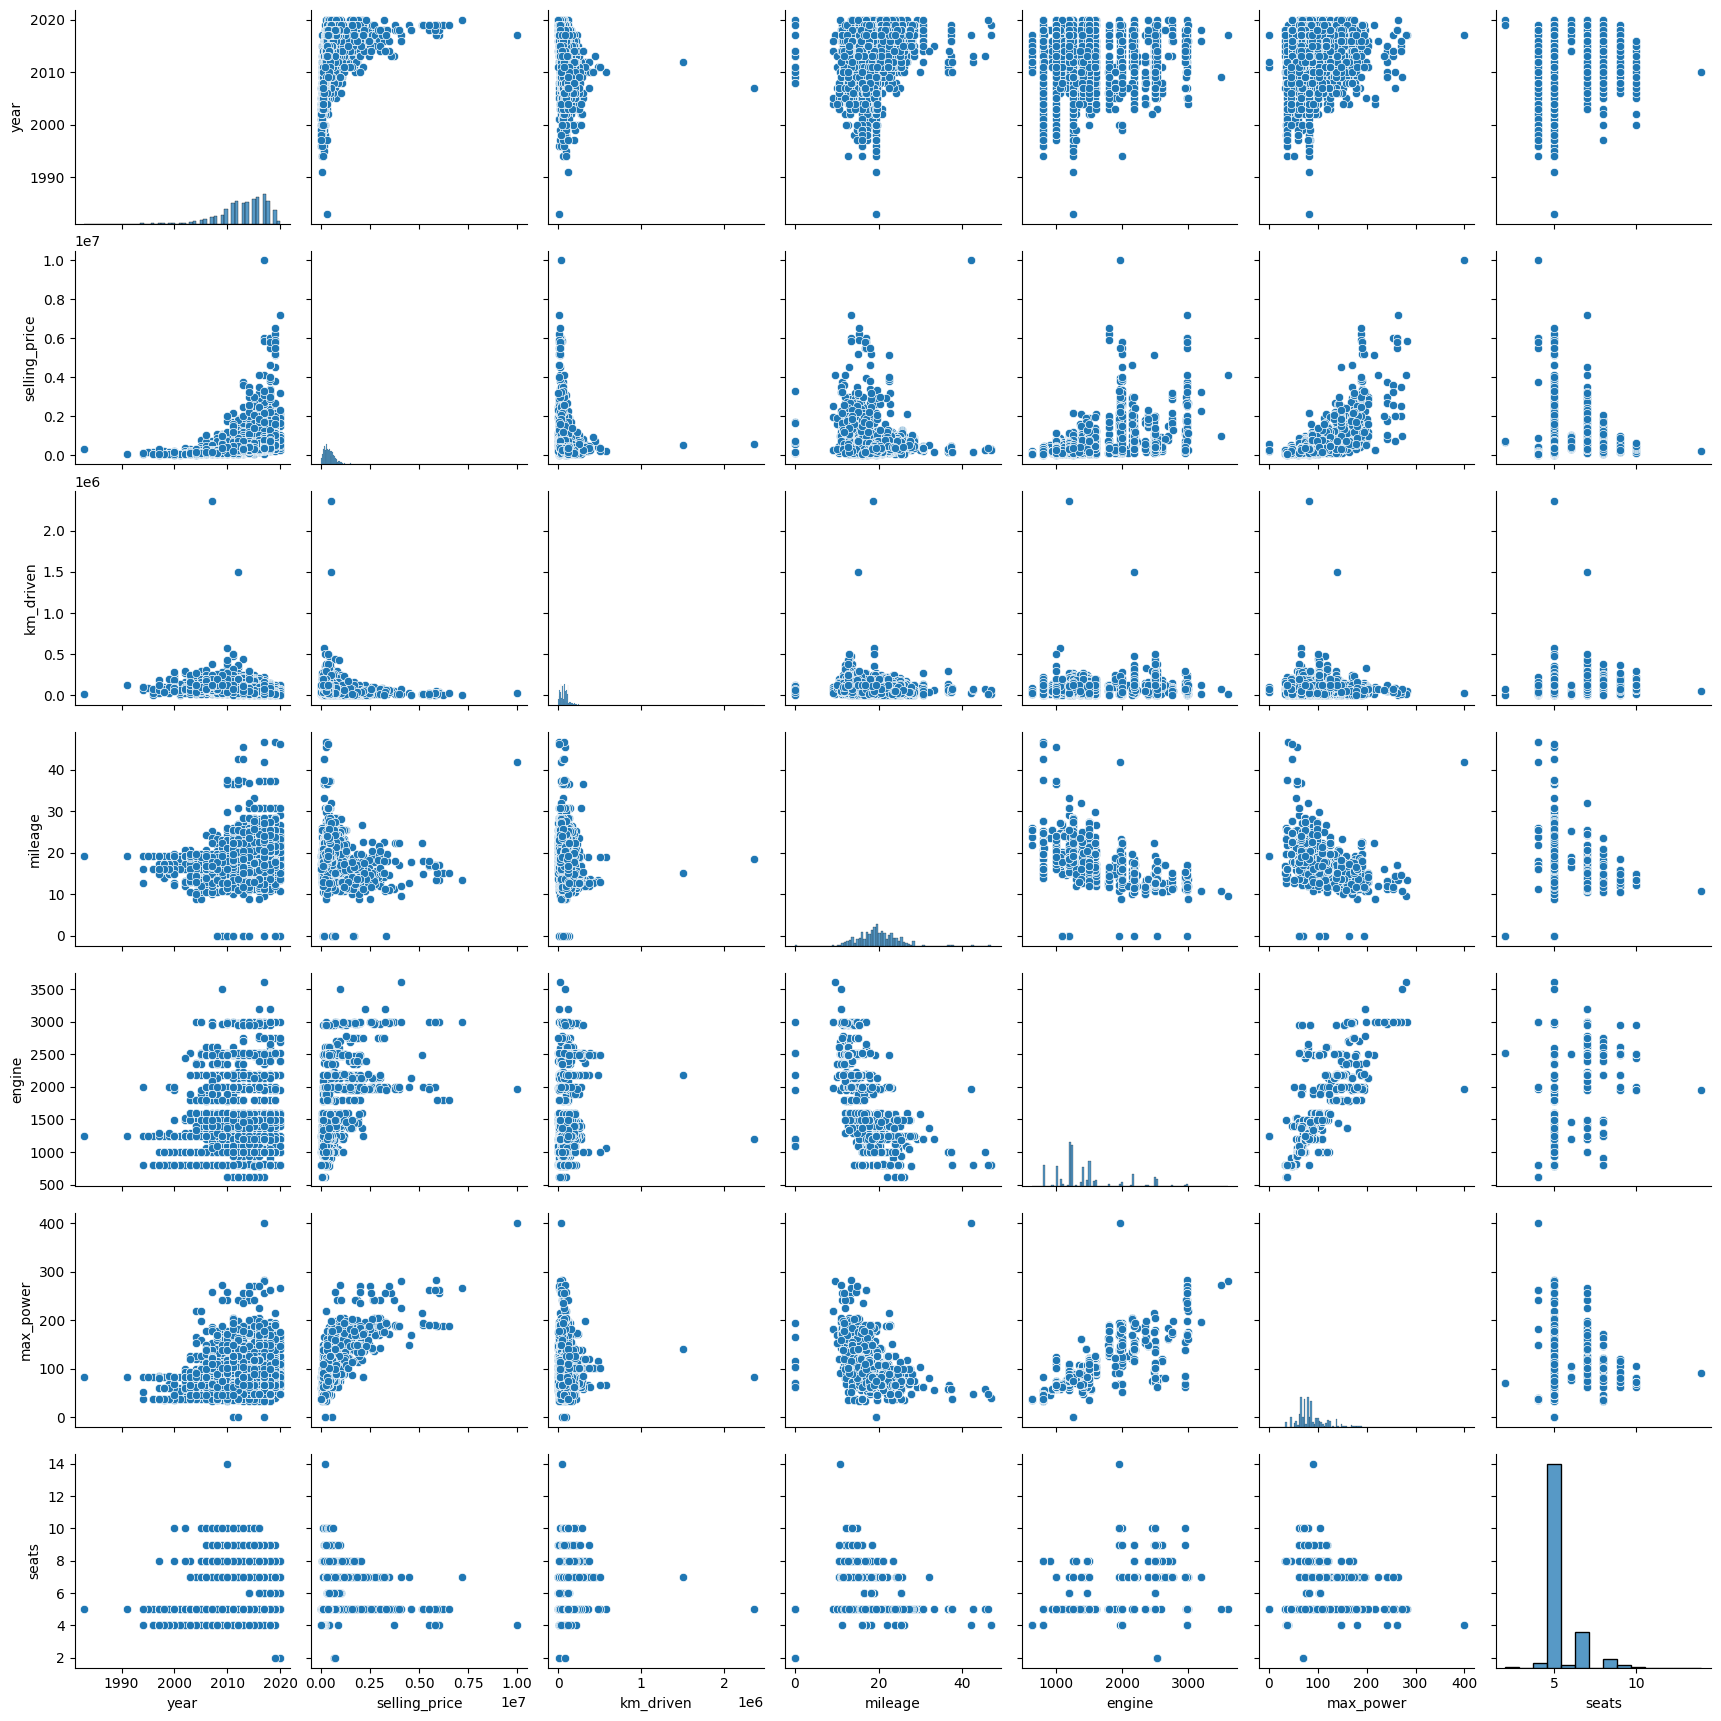

In [ ]:
sns.pairplot(df_train)

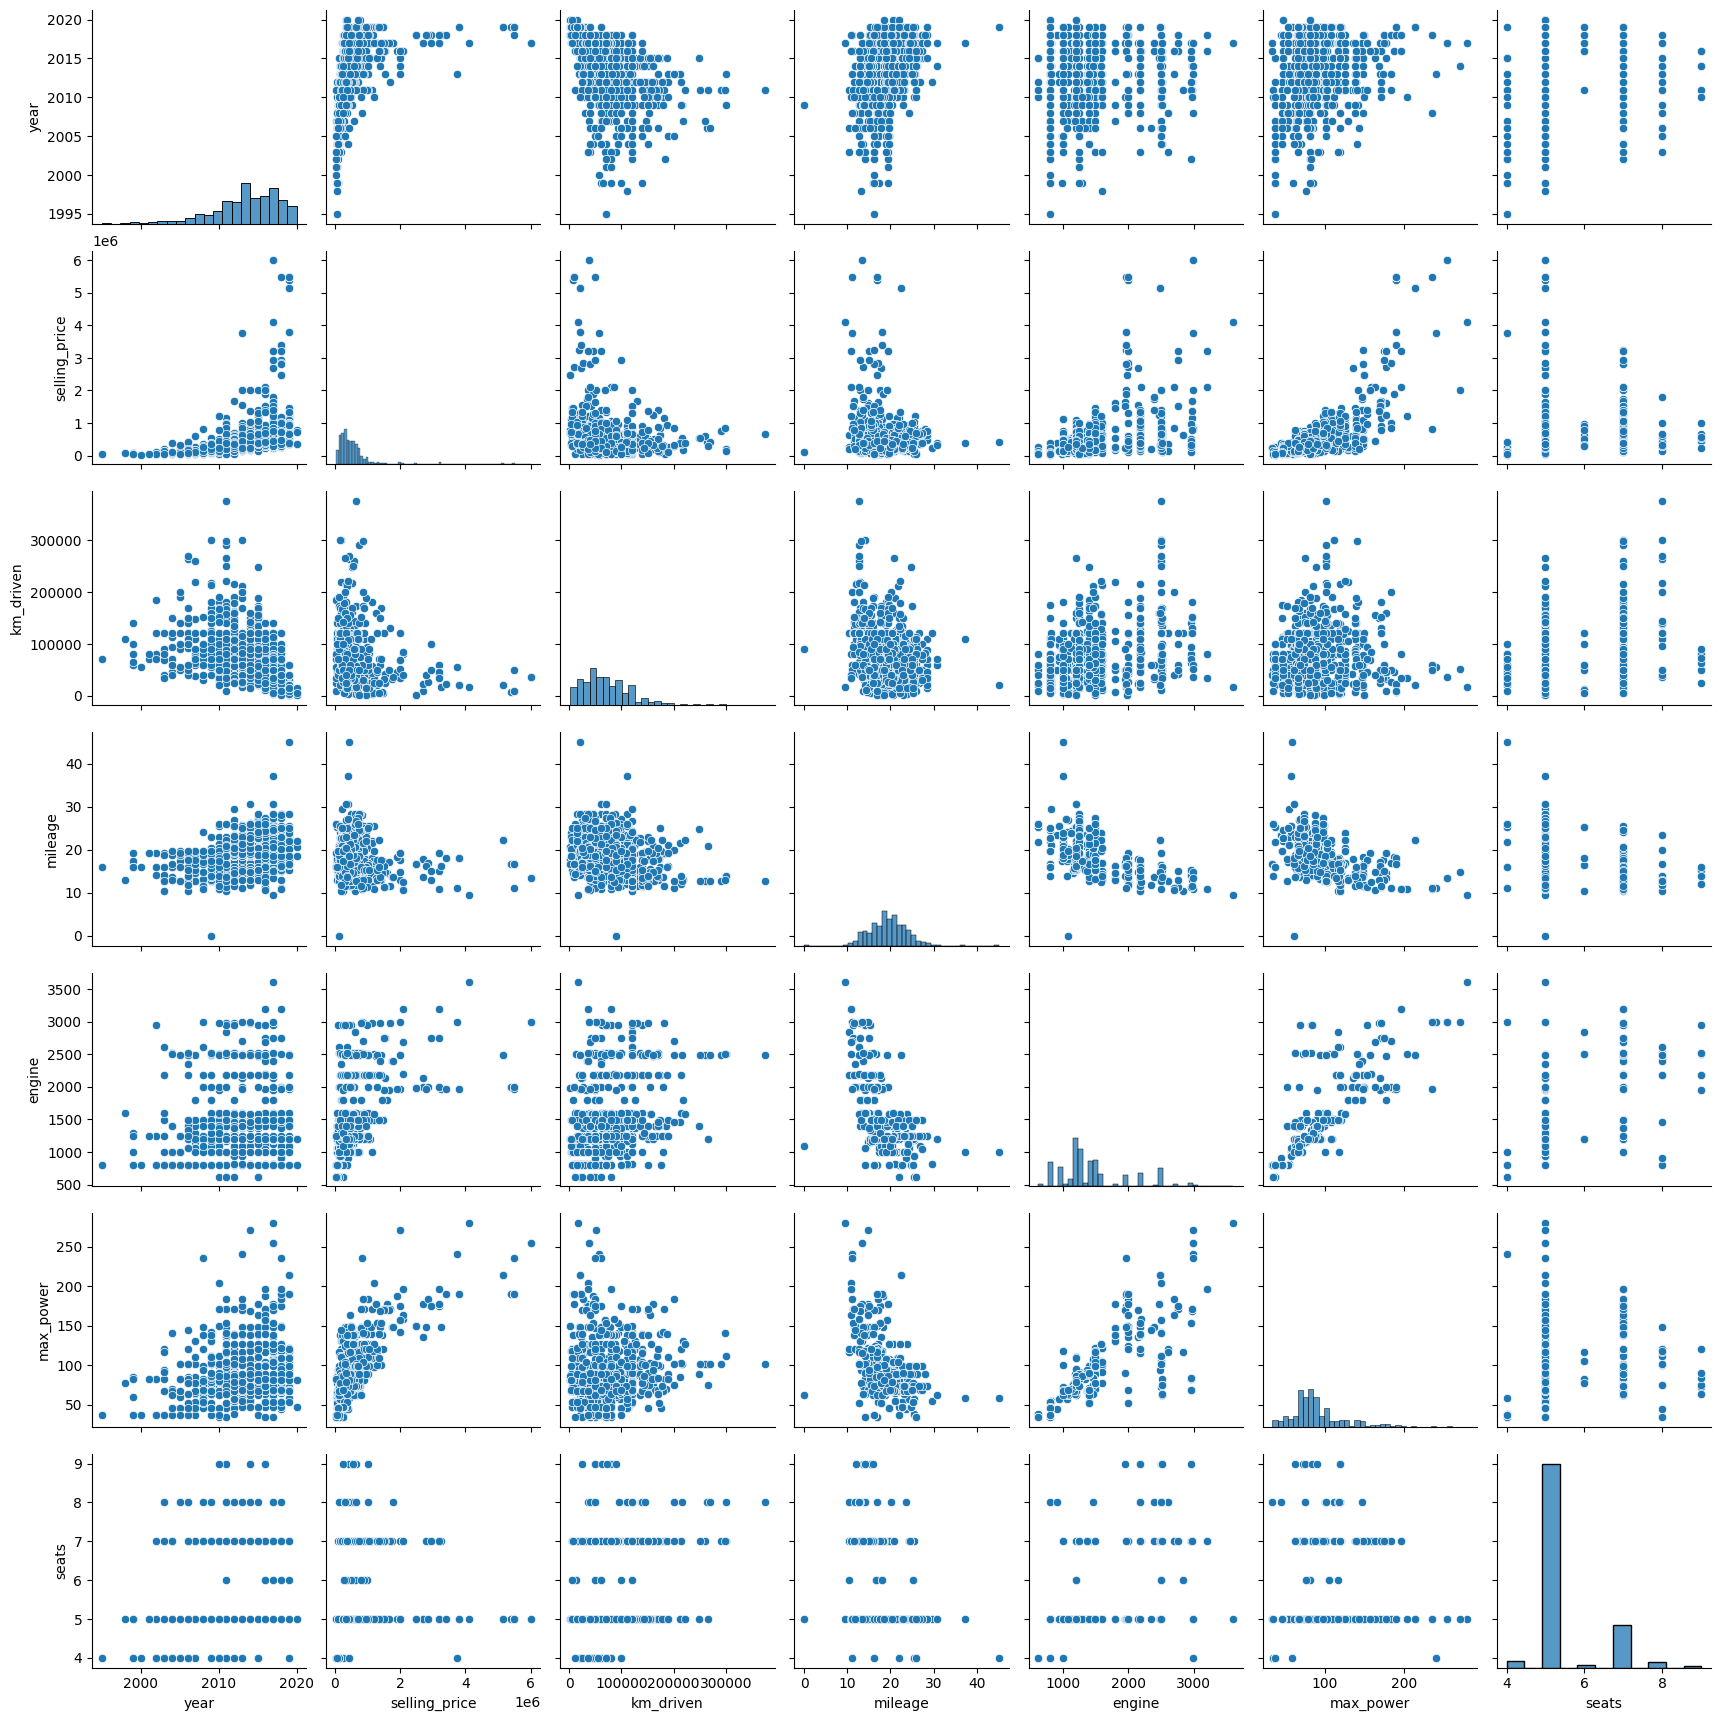

In [ ]:
sns.pairplot(df_test)

1) Можно ли предположить на основе распределений связь признаков с целевой переменной?

`Стоимость явно связана с годом (чем позже, тем более вероятно дороже), с километражом (чем меньше, тем дороже), менее явные зависимости с другими признаками тоже есть.`

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

`Да. Например, max_power/ engine. `

2) Похожими ли оказались совокупности при разделении на трейн и тест?

`Как будто вполне!`




### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


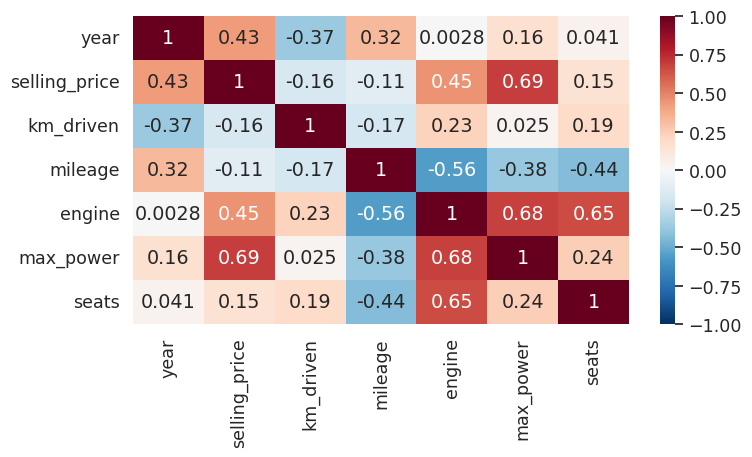

In [ ]:
corr = df_train.select_dtypes(include='number').corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    corr,
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Наименее скоррелированы engine и year.`

`Сильная положительная зависимость: max_power/selling_price, engine/max_power.`

`Так как зависимость между year и km_driven есть, и она отрицательная, действительно можно предположить, что более старая машина проехала больше киломаетров. Но зависимость не слишком яркая.`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

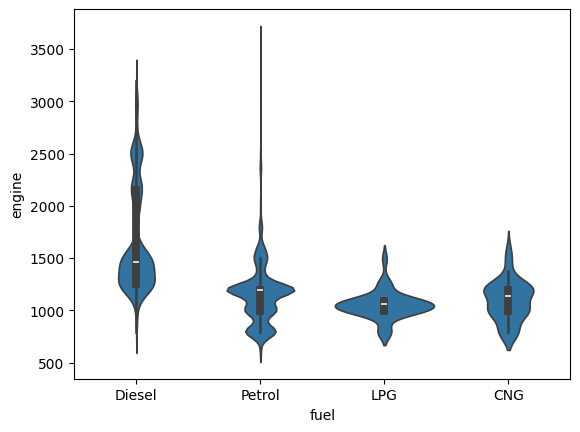

In [ ]:
sns.violinplot(data=df_train, x='fuel', y='engine')
plt.show()

# можно посмотреть зависимости и различия распределений числовых переменных по категориальным

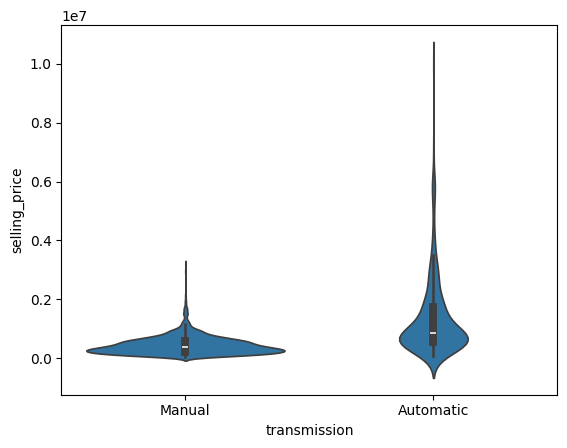

In [ ]:
sns.violinplot(data=df_train, x='transmission', y='selling_price')
plt.show()

# дорогие тачки с акпп

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
df_train_v,df_test_v = df_train.select_dtypes(include='number'), df_test.select_dtypes(include='number') #seats у меня уже обработан как числовой

In [ ]:
y_train = df_train_v.selling_price
X_train = df_train_v.drop('selling_price',axis=1)

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_test = df_test_v.selling_price
X_test = df_test_v.drop('selling_price',axis=1)

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
prediction_1 = model.predict(X_test)

In [ ]:
''' MSE оценить сложно, на то она и неограниченная метрика, по R2 можем точно сказать,
что модель предсказывает получше, чем просто "в среднее" (так как ближе к 1), но от идеала еще далека
'''

print('MSE: ', MSE(y_test, prediction_1))
print('R2: ', r2_score(y_test, prediction_1))

MSE:  233150131369.0009
R2:  0.5944005754723716


In [ ]:
 MSE(y_test, prediction_1)**0.5 # смотрю еще корень из MSE, чтобы лучше понимать реальную ошибку.

482856.2222535823

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_v = StandardScaler()
X_train_std = pd.DataFrame(scaler_v.fit_transform(X_train), columns = X_train.columns)
X_test_std = pd.DataFrame(scaler_v.transform(X_test), columns = X_test.columns)

In [ ]:
model = LinearRegression()
model.fit(X_train_std, y_train)
prediction_2 = model.predict(X_test_std)
print('MSE: ', MSE(y_test, prediction_2))
print('R2: ', r2_score(y_test, prediction_2))

# ну да, результат малозаметный

MSE:  233150131368.99503
R2:  0.5944005754723818


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
weights = pd.DataFrame({
    'Feature': X_train_std.columns,
    'Weight': model.coef_})
print(weights)

# веса получаются большими, тк целевую переменную мы не стандартизируем, иначе столкнемся со сложностью интерпретации
# наиболее информативный признак - max_power

     Feature         Weight
0       year  153264.556369
1  km_driven  -44148.661899
2    mileage   28971.284319
3     engine   60838.757425
4  max_power  323161.225864
5      seats  -23432.545350


(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([-44148.66189871,  -7417.67312247,  29313.31565378,  66044.30443003,
        102775.29320627, 139506.28198252, 176237.27075876, 212968.25953501,
        249699.24831125, 286430.2370875 , 323161.22586374]),
 <BarContainer object of 10 artists>)

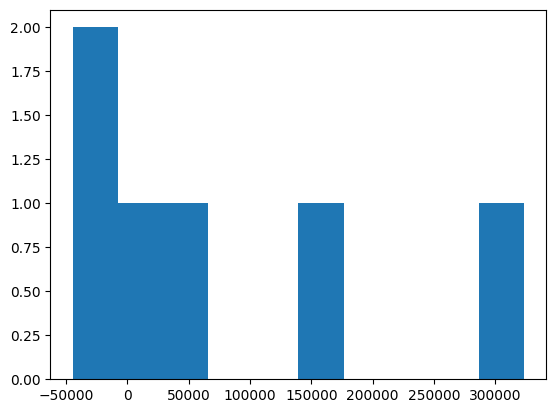

In [ ]:
plt.hist(model.coef_)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_std, y_train)

y_pred_train = lasso.predict(X_train_std)
y_pred_test_3 = lasso.predict(X_test_std)

print('Initial MSE:', MSE(y_test, prediction_2))
print('Initial R2: ', r2_score(y_test, prediction_2))
print('Test MSE:', MSE(y_test, y_pred_test_3))
print('Test R2: ', r2_score(y_test, y_pred_test_3))
print(lasso.coef_,'\n')


Initial MSE: 233150131368.99503
Initial R2:  0.5944005754723818
Test MSE: 233150811492.6237
Test R2:  0.594399392295899
[153264.27474451 -44147.55242207  28969.50331731  60833.96196385
 323162.11890202 -23429.61544362] 



`Почему не зануляет, предположения: `
*   штраф за ненулевые веса небольшой
*   не стандартизировали целевую переменную, потому нельзя сказать, что данные масштабированы полностью
*   выбранные признаки значимы



### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}
lasso = Lasso(max_iter=10000)

gs = GridSearchCV(lasso, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_std, y_train)

print(f"Лучший alpha: {gs.best_params_['alpha']}")
print(f"Количество обученных моделей: {len(params['alpha']) * 10}")
print("Веса признаков в лучшей модели:")
print(gs.best_estimator_.coef_)

print(f"Количество зануленных весов: {np.sum(gs.best_estimator_.coef_ == 0)}")

Лучший alpha: 10
Количество обученных моделей: 50
Веса признаков в лучшей модели:
[153261.65525568 -44137.73018764  28953.78133559  60791.76567977
 323169.76685389 -23403.61026483]
Количество зануленных весов: 0


In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_std, y_train)

y_pred_train = lasso.predict(X_train_std)
y_pred_test = lasso.predict(X_test_std)

print('Train MSE:', MSE(y_train, y_pred_train))
print('Train R2: ', r2_score(y_train, y_pred_train))

print('Test MSE:', MSE(y_test, y_pred_test_3))
print('Test R2: ', r2_score(y_test, y_pred_test_3))

Train MSE: 116845734685.6042
Train R2:  0.5923583169125314
Test MSE: 233150811492.6237
Test R2:  0.594399392295899


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]}

elastic_net = ElasticNet(random_state=42, max_iter=10000)

grid_search = GridSearchCV(
    elastic_net,
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error')

grid_search.fit(X_train_std, y_train)

y_pred_test_4 = grid_search.best_estimator_.predict(X_test_std)
mse_en = MSE(y_test, y_pred_test_4)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Обучено моделей: {len(param_grid['alpha']) * len(param_grid['l1_ratio']) *10}")
print(f"MSE: {mse_en:.3f}")
print('R2: ', r2_score(y_test, y_pred_test_4))

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Обучено моделей: 200
MSE: 234417114739.663
R2:  0.5921964689466361


Ответы на вопросы вывела

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
X_train_cat ,X_test_cat = df_train.select_dtypes(exclude='number'), df_test.select_dtypes(exclude='number')

In [ ]:
df_train.name.nunique() # обработаю

1924

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
X_train_cat.name = X_train_cat.name.str.split(' ').str[0]
X_test_cat.name = X_test_cat.name.str.split(' ').str[0]

In [ ]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориальные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#закодируем seats и исключим его из X_train_std, чтобы по своей значимости не стал вдважды выше без оснований

X_combined = pd.concat([X_train_cat, df_train['seats'].astype(str)], axis=1)
X_2combined = pd.concat([X_test_cat, df_test['seats'].astype(str)], axis=1)

one_hot = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
enc = one_hot.fit_transform(X_combined)
enc_2 = one_hot.transform(X_2combined)

encoded_train = pd.DataFrame(enc, columns=one_hot.get_feature_names_out(X_combined.columns))
encoded_test = pd.DataFrame(enc_2, columns=one_hot.get_feature_names_out(X_2combined.columns))
encoded_test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


name_Audi  name_BMW  name_Chevrolet  name_Daewoo  name_Datsun  name_Fiat  \
0          0.0       0.0             0.0          0.0          0.0        0.0   
1          0.0       0.0             0.0          0.0          0.0        0.0   
2          0.0       0.0             0.0          0.0          0.0        0.0   
3          0.0       0.0             0.0          0.0          0.0        0.0   
4          0.0       0.0             0.0          0.0          0.0        0.0   
..         ...       ...             ...          ...          ...        ...   
995        0.0       0.0             0.0          0.0          0.0        0.0   
996        0.0       0.0             0.0          0.0          0.0        0.0   
997        0.0       0.0             0.0          0.0          0.0        0.0   
998        0.0       0.0             0.0          0.0          0.0        0.0   
999        0.0       0.0             0.0          0.0          0.0        0.0   

     name_Force  name_Ford  name_Honda  name_Hyundai  ...  \
0           0.0        0.0         0.0           0.0  ...   
1           0.0        0.0         0.0           0.0  ...   
2           0.0        0.0         1.0           0.0  ...   
3           0.0        0.0         1.0           0.0  ...   
4           0.0        0.0         0.0           0.0  ...   
..          ...        ...         ...           ...  ...   
995         0.0        0.0         0.0           1.0  ...   
996         0.0        0.0         0.0           1.0  ...   
997         0.0        0.0         0.0           1.0  ...   
998         0.0        0.0         0.0           1.0  ...   
999         0.0        0.0         1.0           0.0  ...   

     owner_Test Drive Car  owner_Third Owner  seats_14  seats_2  seats_4  \
0                     0.0                0.0       0.0      0.0      0.0   
1                     0.0                0.0       0.0      0.0      0.0   
2                     0.0                0.0       0.0      0.0      0.0   
3                     0.0                0.0       0.0      0.0      0.0   
4                     0.0                0.0       0.0      0.0      0.0   
..                    ...                ...       ...      ...      ...   
995                   0.0                0.0       0.0      0.0      0.0   
996                   0.0                0.0       0.0      0.0      0.0   
997                   0.0                0.0       0.0      0.0      0.0   
998                   0.0                0.0       0.0      0.0      0.0   
999                   0.0                0.0       0.0      0.0      0.0   

     seats_5  seats_6  seats_7  seats_8  seats_9  
0        0.0      0.0      1.0      0.0      0.0  
1        1.0      0.0      0.0      0.0      0.0  
2        1.0      0.0      0.0      0.0      0.0  
3        1.0      0.0      0.0      0.0      0.0  
4        1.0      0.0      0.0      0.0      0.0  
..       ...      ...      ...      ...      ...  
995      1.0      0.0      0.0      0.0      0.0  
996      1.0      0.0      0.0      0.0      0.0  
997      1.0      0.0      0.0      0.0      0.0  
998      1.0      0.0      0.0      0.0      0.0  
999      1.0      0.0      0.0      0.0      0.0  

[1000 rows x 47 columns]

In [ ]:
X_train_std.drop('seats', axis=1, inplace=True)

In [ ]:
X_test_std.drop('seats', axis=1, inplace=True)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
# объединим признаки

X_train_encoded = pd.concat([encoded_train, X_train_std], axis=1)
X_test_encoded = pd.concat([encoded_test, X_test_std], axis=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 12, 15, 100, 1000]}
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', cv=10)

grid_search.fit(X_train_encoded, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший R2: {grid_search.best_score_}")

Лучшие параметры: {'alpha': 1}
Лучший R2: 0.7105999270296747


In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_encoded, y_train)

y_pred_train = ridge.predict(X_train_encoded)
y_pred_test_5 = ridge.predict(X_test_encoded)

print('Train MSE:', MSE(y_train, y_pred_train))
print('Train R2: ', r2_score(y_train, y_pred_train))

print('Test MSE:', MSE(y_test, y_pred_test_5))
print('Test R2: ', r2_score(y_test, y_pred_test_5))

Train MSE: 73515664694.44476
Train R2:  0.7435246620685623
Test MSE: 145938230579.1585
Test R2:  0.7461186833053737


`вот как будто удалось!`

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса

In [ ]:
import numpy as np

def business_metric(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    tlr = 0.1 * y_true
    valid_predictions = diff <= tlr
    return np.mean(valid_predictions)

predictions = [prediction_1, prediction_2, y_pred_test_3, y_pred_test_4, y_pred_test_5]

for n, predict in enumerate(predictions, start=1):
  print(f"Значение бизнес метрики для предсказания {n}: {business_metric(y_test, predict)}")


Значение бизнес метрики для предсказания 1: 0.225
Значение бизнес метрики для предсказания 2: 0.225
Значение бизнес метрики для предсказания 3: 0.225
Значение бизнес метрики для предсказания 4: 0.223
Значение бизнес метрики для предсказания 5: 0.276


`Худший результат по бизнес метрике дала ElasticNet регрессия. Самое точное по R2 предсказание осталось лучшим`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
# будет в PY файле
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
from io import StringIO
import pandas as pd
import pickle

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


#Загрузка сохраненных объектов
with open("all_objects.pkl", "rb") as f:
    saved_objects = pickle.load(f)

md = saved_objects["model"]
sc_v = saved_objects["scaler_1"]
enc_ohe = saved_objects["encoder_1"]


def preproc_predict(item: Item) -> float:
    input_data = pd.DataFrame([item.dict()])

    # Преобразование данных
    input_data['mileage'] = input_data['mileage'].apply(
        lambda i: float(i[:-6]) * 1.40 if str(i).endswith('km/kg') else (float(i[:-5]) if str(i).endswith('kmpl') else i)
    )
    input_data['mileage'] = input_data['mileage'].astype('float')
    input_data['engine'] = input_data['engine'].str[:-2].astype('float')
    input_data['max_power'] = input_data['max_power'].map(
        lambda i: float(i[:-4]) if str(i).endswith('bhp') else None
    )
    input_data.drop(columns='torque', inplace=True)

    input_data[['engine', 'seats']] = input_data[['engine', 'seats']].astype(int)

    # Нормализация числовых признаков
    v = input_data.select_dtypes(include='number')
    X_std = pd.DataFrame(sc_v.transform(v), columns=v.columns)

    # Обработка категориальных признаков
    cat = input_data.select_dtypes(exclude='number')
    cat['name'] = cat['name'].str.split(' ').str[0]

    X_combined = pd.concat([cat, input_data['seats'].astype(str)], axis=1)
    enc_features = enc_ohe.transform(X_combined)
    X_proc = pd.DataFrame(enc_features, columns=enc_ohe.get_feature_names_out(X_combined.columns))
    X_std.drop('seats', axis=1, inplace=True)

    # Финальная сборка данных
    X_fin_encoded = pd.concat([X_proc, X_std], axis=1)

    # Предсказание
    prediction = md.predict(X_fin_encoded)
    return float(prediction[0])


@app.post("/predict_item")
def predict_item(item: Item):
    try:
        prediction = preproc_predict(item)
        return {"predicted_price": prediction}
    except Exception as e:
        return {"error": str(e)}


@app.post("/predict_items")
def predict_items(items: Items):
    predictions = []
    for item in items.objects:
        try:
            predictions.append(preproc_predict(item))
        except Exception as e:
            predictions.append(None)  в

    fin_df = pd.DataFrame(items.dict()["objects"])
    fin_df["predicted_price"] = predictions

    csv_buffer = StringIO()
    fin_df.to_csv(csv_buffer, index=False)

    csv_buffer.seek(0)
    return {"csv": csv_buffer.getvalue()}


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



`Предположу, что кот г-жи Елены К.!`